In [1]:
%cd ../..

/home/eli/AnacondaProjects/combinators


In [2]:
import logging

import probtorch
import torch

from combinators.inference import GuidedConditioning
from combinators.inference import importance, mcmc
import combinators.model as model
from combinators.model import foldable
import combinators
import combinators.utils as utils

from examples.ssm import ssm

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mu = torch.zeros(1)
sigma = torch.ones(1) / 2
delta = torch.ones(1)
zs = torch.ones(50+1) * -1
zs[0] = 0.0

In [5]:
ssm_initializer = model.Deterministic(zs[0], mu, sigma, delta, batch_shape=tuple())
ssm_step = foldable.Foldable(ssm.SsmStep(batch_shape=tuple()), initializer=ssm_initializer)
ssm_sequence = foldable.Reduce(ssm_step, generator=lambda: range(zs.shape[0]-1))

In [6]:
_, generative, _ = ssm_sequence()

In [7]:
data = {k: v.value for k, v in generative.variables() if 'X_' in k}

In [8]:
particle_shape = (100,)

In [9]:
ssm_params = {
    'mu': {
        'loc': torch.tensor(0.),
        'scale': torch.tensor(1.),
    },
    'sigma': {
        'loc': torch.tensor(1.),
        'scale': torch.tensor(1.),
    },
    'delta': {
        'loc': torch.tensor(1.),
        'scale': torch.tensor(1.),
    }
}

In [10]:
init_ssm_generative = ssm.InitSsm(params=ssm_params, trainable=False, batch_shape=particle_shape)
init_ssm_proposal = ssm.InitSsm(params=ssm_params, trainable=True, batch_shape=particle_shape)
init_ssm_training = GuidedConditioning(init_ssm_generative, init_ssm_proposal)

In [11]:
ssm_step_training = foldable.Foldable(ssm.SsmStep(batch_shape=particle_shape), initializer=init_ssm_training)
ssm_training = foldable.Reduce(ssm_step_training, lambda: range(50))

In [12]:
inference, init_ssm_params, elbos = importance.variational_importance(
    ssm_training, 2000, data, use_cuda=False,
    lr=1e-2, patience=100
)

02/20/2019 14:43:26 ELBO=-1.98511856e+02 at epoch 1
02/20/2019 14:43:26 ELBO=-2.16259705e+02 at epoch 2
02/20/2019 14:43:26 ELBO=-1.94108719e+02 at epoch 3
02/20/2019 14:43:26 ELBO=-2.81869507e+02 at epoch 4
02/20/2019 14:43:26 ELBO=-3.34357727e+02 at epoch 5
02/20/2019 14:43:26 ELBO=-2.02044342e+02 at epoch 6
02/20/2019 14:43:26 ELBO=-3.91757568e+02 at epoch 7
02/20/2019 14:43:26 ELBO=-1.74309296e+02 at epoch 8
02/20/2019 14:43:26 ELBO=-2.59585358e+02 at epoch 9
02/20/2019 14:43:26 ELBO=-1.50112976e+02 at epoch 10
02/20/2019 14:43:26 ELBO=-1.66515762e+02 at epoch 11
02/20/2019 14:43:26 ELBO=-2.20820755e+02 at epoch 12
02/20/2019 14:43:26 ELBO=-2.05145264e+02 at epoch 13
02/20/2019 14:43:26 ELBO=-2.86268188e+02 at epoch 14
02/20/2019 14:43:26 ELBO=-2.61299591e+02 at epoch 15
02/20/2019 14:43:26 ELBO=-3.09822418e+02 at epoch 16
02/20/2019 14:43:26 ELBO=-1.62666748e+02 at epoch 17
02/20/2019 14:43:26 ELBO=-2.49778214e+02 at epoch 18
02/20/2019 14:43:26 ELBO=-1.73146194e+02 at epoch 19
02

Epoch   133: reducing learning rate of group 0 to 5.0000e-03.


02/20/2019 14:43:32 ELBO=-1.85595108e+02 at epoch 138
02/20/2019 14:43:32 ELBO=-1.64789658e+02 at epoch 139
02/20/2019 14:43:32 ELBO=-1.54367523e+02 at epoch 140
02/20/2019 14:43:32 ELBO=-1.76614212e+02 at epoch 141
02/20/2019 14:43:32 ELBO=-1.42808762e+02 at epoch 142
02/20/2019 14:43:32 ELBO=-1.88416824e+02 at epoch 143
02/20/2019 14:43:32 ELBO=-2.48828217e+02 at epoch 144
02/20/2019 14:43:32 ELBO=-1.59197891e+02 at epoch 145
02/20/2019 14:43:32 ELBO=-1.76518097e+02 at epoch 146
02/20/2019 14:43:32 ELBO=-2.17519608e+02 at epoch 147
02/20/2019 14:43:32 ELBO=-1.59717697e+02 at epoch 148
02/20/2019 14:43:32 ELBO=-1.97329697e+02 at epoch 149
02/20/2019 14:43:32 ELBO=-1.48554993e+02 at epoch 150
02/20/2019 14:43:32 ELBO=-1.74744476e+02 at epoch 151
02/20/2019 14:43:32 ELBO=-1.59739227e+02 at epoch 152
02/20/2019 14:43:33 ELBO=-2.60618469e+02 at epoch 153
02/20/2019 14:43:33 ELBO=-1.14926537e+02 at epoch 154
02/20/2019 14:43:33 ELBO=-2.00243790e+02 at epoch 155
02/20/2019 14:43:33 ELBO=-1.

Epoch   254: reducing learning rate of group 0 to 2.5000e-03.


02/20/2019 14:43:36 ELBO=-1.47577133e+02 at epoch 262
02/20/2019 14:43:36 ELBO=-1.64456955e+02 at epoch 263
02/20/2019 14:43:36 ELBO=-1.41024963e+02 at epoch 264
02/20/2019 14:43:36 ELBO=-1.60950775e+02 at epoch 265
02/20/2019 14:43:36 ELBO=-2.08922379e+02 at epoch 266
02/20/2019 14:43:37 ELBO=-2.88578613e+02 at epoch 267
02/20/2019 14:43:37 ELBO=-1.77085480e+02 at epoch 268
02/20/2019 14:43:37 ELBO=-2.49480698e+02 at epoch 269
02/20/2019 14:43:37 ELBO=-1.97388474e+02 at epoch 270
02/20/2019 14:43:37 ELBO=-1.32370804e+02 at epoch 271
02/20/2019 14:43:37 ELBO=-1.69604538e+02 at epoch 272
02/20/2019 14:43:37 ELBO=-1.48031189e+02 at epoch 273
02/20/2019 14:43:37 ELBO=-1.48750641e+02 at epoch 274
02/20/2019 14:43:37 ELBO=-1.62001144e+02 at epoch 275
02/20/2019 14:43:37 ELBO=-2.07363907e+02 at epoch 276
02/20/2019 14:43:37 ELBO=-1.86272537e+02 at epoch 277
02/20/2019 14:43:37 ELBO=-1.99294083e+02 at epoch 278
02/20/2019 14:43:37 ELBO=-1.61232712e+02 at epoch 279
02/20/2019 14:43:37 ELBO=-1.

Epoch   355: reducing learning rate of group 0 to 1.2500e-03.


02/20/2019 14:43:40 ELBO=-2.68035828e+02 at epoch 363
02/20/2019 14:43:40 ELBO=-1.53327667e+02 at epoch 364
02/20/2019 14:43:40 ELBO=-1.81124222e+02 at epoch 365
02/20/2019 14:43:40 ELBO=-1.38962051e+02 at epoch 366
02/20/2019 14:43:40 ELBO=-2.58815674e+02 at epoch 367
02/20/2019 14:43:40 ELBO=-2.19234161e+02 at epoch 368
02/20/2019 14:43:40 ELBO=-1.89612747e+02 at epoch 369
02/20/2019 14:43:40 ELBO=-1.72272034e+02 at epoch 370
02/20/2019 14:43:40 ELBO=-2.57413666e+02 at epoch 371
02/20/2019 14:43:40 ELBO=-1.93458008e+02 at epoch 372
02/20/2019 14:43:40 ELBO=-2.01617783e+02 at epoch 373
02/20/2019 14:43:40 ELBO=-1.90042313e+02 at epoch 374
02/20/2019 14:43:40 ELBO=-2.68913544e+02 at epoch 375
02/20/2019 14:43:40 ELBO=-1.41364548e+02 at epoch 376
02/20/2019 14:43:40 ELBO=-1.32963058e+02 at epoch 377
02/20/2019 14:43:40 ELBO=-1.41420532e+02 at epoch 378
02/20/2019 14:43:40 ELBO=-1.87109146e+02 at epoch 379
02/20/2019 14:43:40 ELBO=-2.27329788e+02 at epoch 380
02/20/2019 14:43:40 ELBO=-2.

Epoch   557: reducing learning rate of group 0 to 6.2500e-04.


02/20/2019 14:43:46 ELBO=-3.25019165e+02 at epoch 565
02/20/2019 14:43:46 ELBO=-1.44299545e+02 at epoch 566
02/20/2019 14:43:46 ELBO=-1.55328568e+02 at epoch 567
02/20/2019 14:43:46 ELBO=-1.43702789e+02 at epoch 568
02/20/2019 14:43:46 ELBO=-1.64906128e+02 at epoch 569
02/20/2019 14:43:46 ELBO=-1.66372787e+02 at epoch 570
02/20/2019 14:43:46 ELBO=-1.95862274e+02 at epoch 571
02/20/2019 14:43:46 ELBO=-2.25995483e+02 at epoch 572
02/20/2019 14:43:46 ELBO=-2.15293259e+02 at epoch 573
02/20/2019 14:43:46 ELBO=-1.43803131e+02 at epoch 574
02/20/2019 14:43:46 ELBO=-1.50467285e+02 at epoch 575
02/20/2019 14:43:46 ELBO=-2.22639038e+02 at epoch 576
02/20/2019 14:43:46 ELBO=-1.62562744e+02 at epoch 577
02/20/2019 14:43:46 ELBO=-4.61657349e+02 at epoch 578
02/20/2019 14:43:46 ELBO=-1.89492218e+02 at epoch 579
02/20/2019 14:43:46 ELBO=-1.26727493e+02 at epoch 580
02/20/2019 14:43:46 ELBO=-1.47556610e+02 at epoch 581
02/20/2019 14:43:46 ELBO=-1.46740646e+02 at epoch 582
02/20/2019 14:43:47 ELBO=-1.

Epoch   658: reducing learning rate of group 0 to 3.1250e-04.


02/20/2019 14:43:49 ELBO=-1.58382751e+02 at epoch 666
02/20/2019 14:43:49 ELBO=-2.24370682e+02 at epoch 667
02/20/2019 14:43:49 ELBO=-1.66510254e+02 at epoch 668
02/20/2019 14:43:49 ELBO=-1.34982803e+02 at epoch 669
02/20/2019 14:43:49 ELBO=-1.42684311e+02 at epoch 670
02/20/2019 14:43:49 ELBO=-1.92776489e+02 at epoch 671
02/20/2019 14:43:49 ELBO=-1.78831863e+02 at epoch 672
02/20/2019 14:43:49 ELBO=-1.44550674e+02 at epoch 673
02/20/2019 14:43:49 ELBO=-3.08555664e+02 at epoch 674
02/20/2019 14:43:49 ELBO=-2.58181671e+02 at epoch 675
02/20/2019 14:43:49 ELBO=-2.33690842e+02 at epoch 676
02/20/2019 14:43:49 ELBO=-1.78438660e+02 at epoch 677
02/20/2019 14:43:49 ELBO=-1.66385651e+02 at epoch 678
02/20/2019 14:43:49 ELBO=-2.04391953e+02 at epoch 679
02/20/2019 14:43:50 ELBO=-2.88300018e+02 at epoch 680
02/20/2019 14:43:50 ELBO=-1.44565155e+02 at epoch 681
02/20/2019 14:43:50 ELBO=-1.48833282e+02 at epoch 682
02/20/2019 14:43:50 ELBO=-1.49976166e+02 at epoch 683
02/20/2019 14:43:50 ELBO=-1.

Epoch   759: reducing learning rate of group 0 to 1.5625e-04.


02/20/2019 14:43:52 ELBO=-2.63697937e+02 at epoch 768
02/20/2019 14:43:52 ELBO=-1.73574280e+02 at epoch 769
02/20/2019 14:43:52 ELBO=-1.38791702e+02 at epoch 770
02/20/2019 14:43:52 ELBO=-2.47405319e+02 at epoch 771
02/20/2019 14:43:52 ELBO=-1.47151947e+02 at epoch 772
02/20/2019 14:43:52 ELBO=-1.69192520e+02 at epoch 773
02/20/2019 14:43:52 ELBO=-1.31402435e+02 at epoch 774
02/20/2019 14:43:52 ELBO=-1.34652756e+02 at epoch 775
02/20/2019 14:43:52 ELBO=-1.35726471e+02 at epoch 776
02/20/2019 14:43:52 ELBO=-1.61619537e+02 at epoch 777
02/20/2019 14:43:53 ELBO=-1.61857224e+02 at epoch 778
02/20/2019 14:43:53 ELBO=-1.99811401e+02 at epoch 779
02/20/2019 14:43:53 ELBO=-1.48706711e+02 at epoch 780
02/20/2019 14:43:53 ELBO=-1.53956268e+02 at epoch 781
02/20/2019 14:43:53 ELBO=-2.15307007e+02 at epoch 782
02/20/2019 14:43:53 ELBO=-2.12886719e+02 at epoch 783
02/20/2019 14:43:53 ELBO=-1.46750839e+02 at epoch 784
02/20/2019 14:43:53 ELBO=-1.52343689e+02 at epoch 785
02/20/2019 14:43:53 ELBO=-1.

Epoch   860: reducing learning rate of group 0 to 7.8125e-05.


02/20/2019 14:43:56 ELBO=-1.28979248e+02 at epoch 867
02/20/2019 14:43:56 ELBO=-2.28189697e+02 at epoch 868
02/20/2019 14:43:56 ELBO=-1.47051056e+02 at epoch 869
02/20/2019 14:43:56 ELBO=-1.64463608e+02 at epoch 870
02/20/2019 14:43:56 ELBO=-1.28798019e+02 at epoch 871
02/20/2019 14:43:56 ELBO=-1.92239700e+02 at epoch 872
02/20/2019 14:43:56 ELBO=-1.40948715e+02 at epoch 873
02/20/2019 14:43:56 ELBO=-1.94956909e+02 at epoch 874
02/20/2019 14:43:56 ELBO=-1.34646255e+02 at epoch 875
02/20/2019 14:43:56 ELBO=-1.48915787e+02 at epoch 876
02/20/2019 14:43:56 ELBO=-2.14824081e+02 at epoch 877
02/20/2019 14:43:56 ELBO=-1.70692230e+02 at epoch 878
02/20/2019 14:43:56 ELBO=-1.48257339e+02 at epoch 879
02/20/2019 14:43:56 ELBO=-1.26289619e+02 at epoch 880
02/20/2019 14:43:56 ELBO=-1.19979904e+02 at epoch 881
02/20/2019 14:43:56 ELBO=-1.52976944e+02 at epoch 882
02/20/2019 14:43:56 ELBO=-1.61442703e+02 at epoch 883
02/20/2019 14:43:56 ELBO=-1.49964554e+02 at epoch 884
02/20/2019 14:43:56 ELBO=-1.

Epoch   961: reducing learning rate of group 0 to 3.9063e-05.


02/20/2019 14:43:59 ELBO=-1.59963928e+02 at epoch 968
02/20/2019 14:43:59 ELBO=-1.45837769e+02 at epoch 969
02/20/2019 14:43:59 ELBO=-1.50404129e+02 at epoch 970
02/20/2019 14:43:59 ELBO=-2.14635239e+02 at epoch 971
02/20/2019 14:43:59 ELBO=-1.52319595e+02 at epoch 972
02/20/2019 14:43:59 ELBO=-1.50343109e+02 at epoch 973
02/20/2019 14:43:59 ELBO=-2.22051605e+02 at epoch 974
02/20/2019 14:43:59 ELBO=-2.28316833e+02 at epoch 975
02/20/2019 14:43:59 ELBO=-1.65542175e+02 at epoch 976
02/20/2019 14:43:59 ELBO=-1.41987106e+02 at epoch 977
02/20/2019 14:43:59 ELBO=-2.22717133e+02 at epoch 978
02/20/2019 14:43:59 ELBO=-2.45437363e+02 at epoch 979
02/20/2019 14:43:59 ELBO=-2.78989838e+02 at epoch 980
02/20/2019 14:43:59 ELBO=-1.37440201e+02 at epoch 981
02/20/2019 14:43:59 ELBO=-1.40148270e+02 at epoch 982
02/20/2019 14:43:59 ELBO=-1.49824066e+02 at epoch 983
02/20/2019 14:43:59 ELBO=-2.20159637e+02 at epoch 984
02/20/2019 14:43:59 ELBO=-1.39574219e+02 at epoch 985
02/20/2019 14:43:59 ELBO=-1.

Epoch  1062: reducing learning rate of group 0 to 1.9531e-05.


02/20/2019 14:44:02 ELBO=-1.74741745e+02 at epoch 1070
02/20/2019 14:44:02 ELBO=-1.53577286e+02 at epoch 1071
02/20/2019 14:44:02 ELBO=-1.31932190e+02 at epoch 1072
02/20/2019 14:44:02 ELBO=-1.47925842e+02 at epoch 1073
02/20/2019 14:44:03 ELBO=-1.76824936e+02 at epoch 1074
02/20/2019 14:44:03 ELBO=-2.55293503e+02 at epoch 1075
02/20/2019 14:44:03 ELBO=-1.93322113e+02 at epoch 1076
02/20/2019 14:44:03 ELBO=-1.34954987e+02 at epoch 1077
02/20/2019 14:44:03 ELBO=-2.10069473e+02 at epoch 1078
02/20/2019 14:44:03 ELBO=-1.54179459e+02 at epoch 1079
02/20/2019 14:44:03 ELBO=-1.56325027e+02 at epoch 1080
02/20/2019 14:44:03 ELBO=-1.84822174e+02 at epoch 1081
02/20/2019 14:44:03 ELBO=-1.69645111e+02 at epoch 1082
02/20/2019 14:44:03 ELBO=-1.48067535e+02 at epoch 1083
02/20/2019 14:44:03 ELBO=-2.87026550e+02 at epoch 1084
02/20/2019 14:44:03 ELBO=-1.89060898e+02 at epoch 1085
02/20/2019 14:44:03 ELBO=-2.01931580e+02 at epoch 1086
02/20/2019 14:44:03 ELBO=-2.92807343e+02 at epoch 1087
02/20/2019

Epoch  1263: reducing learning rate of group 0 to 9.7656e-06.


02/20/2019 14:44:09 ELBO=-2.42959686e+02 at epoch 1269
02/20/2019 14:44:09 ELBO=-1.58169083e+02 at epoch 1270
02/20/2019 14:44:09 ELBO=-1.70525574e+02 at epoch 1271
02/20/2019 14:44:09 ELBO=-1.49650787e+02 at epoch 1272
02/20/2019 14:44:09 ELBO=-1.48882401e+02 at epoch 1273
02/20/2019 14:44:09 ELBO=-1.69505905e+02 at epoch 1274
02/20/2019 14:44:09 ELBO=-1.77517593e+02 at epoch 1275
02/20/2019 14:44:09 ELBO=-2.17239716e+02 at epoch 1276
02/20/2019 14:44:09 ELBO=-1.69301620e+02 at epoch 1277
02/20/2019 14:44:09 ELBO=-1.38859131e+02 at epoch 1278
02/20/2019 14:44:09 ELBO=-1.78106003e+02 at epoch 1279
02/20/2019 14:44:09 ELBO=-1.41704666e+02 at epoch 1280
02/20/2019 14:44:09 ELBO=-2.31711716e+02 at epoch 1281
02/20/2019 14:44:09 ELBO=-1.54095963e+02 at epoch 1282
02/20/2019 14:44:09 ELBO=-2.29320404e+02 at epoch 1283
02/20/2019 14:44:09 ELBO=-3.14536011e+02 at epoch 1284
02/20/2019 14:44:10 ELBO=-1.77241745e+02 at epoch 1285
02/20/2019 14:44:10 ELBO=-1.43968445e+02 at epoch 1286
02/20/2019

Epoch  1364: reducing learning rate of group 0 to 4.8828e-06.


02/20/2019 14:44:12 ELBO=-1.95867767e+02 at epoch 1371
02/20/2019 14:44:12 ELBO=-1.95199081e+02 at epoch 1372
02/20/2019 14:44:12 ELBO=-1.55811768e+02 at epoch 1373
02/20/2019 14:44:12 ELBO=-1.24516602e+02 at epoch 1374
02/20/2019 14:44:12 ELBO=-2.16828415e+02 at epoch 1375
02/20/2019 14:44:12 ELBO=-2.27877243e+02 at epoch 1376
02/20/2019 14:44:13 ELBO=-1.44480774e+02 at epoch 1377
02/20/2019 14:44:13 ELBO=-1.56933517e+02 at epoch 1378
02/20/2019 14:44:13 ELBO=-1.50743195e+02 at epoch 1379
02/20/2019 14:44:13 ELBO=-1.95051117e+02 at epoch 1380
02/20/2019 14:44:13 ELBO=-1.65130508e+02 at epoch 1381
02/20/2019 14:44:13 ELBO=-1.56469955e+02 at epoch 1382
02/20/2019 14:44:13 ELBO=-1.39493164e+02 at epoch 1383
02/20/2019 14:44:13 ELBO=-1.55836090e+02 at epoch 1384
02/20/2019 14:44:13 ELBO=-2.91969269e+02 at epoch 1385
02/20/2019 14:44:13 ELBO=-2.09015961e+02 at epoch 1386
02/20/2019 14:44:13 ELBO=-1.55179657e+02 at epoch 1387
02/20/2019 14:44:13 ELBO=-1.55049286e+02 at epoch 1388
02/20/2019

Epoch  1465: reducing learning rate of group 0 to 2.4414e-06.


02/20/2019 14:44:16 ELBO=-1.57055878e+02 at epoch 1473
02/20/2019 14:44:16 ELBO=-1.60683090e+02 at epoch 1474
02/20/2019 14:44:16 ELBO=-1.45020355e+02 at epoch 1475
02/20/2019 14:44:16 ELBO=-1.67078522e+02 at epoch 1476
02/20/2019 14:44:16 ELBO=-1.78015610e+02 at epoch 1477
02/20/2019 14:44:16 ELBO=-3.13838806e+02 at epoch 1478
02/20/2019 14:44:16 ELBO=-1.54462692e+02 at epoch 1479
02/20/2019 14:44:16 ELBO=-1.44587982e+02 at epoch 1480
02/20/2019 14:44:16 ELBO=-1.65459625e+02 at epoch 1481
02/20/2019 14:44:16 ELBO=-1.99587906e+02 at epoch 1482
02/20/2019 14:44:16 ELBO=-1.47321594e+02 at epoch 1483
02/20/2019 14:44:16 ELBO=-1.52673904e+02 at epoch 1484
02/20/2019 14:44:16 ELBO=-1.34031418e+02 at epoch 1485
02/20/2019 14:44:16 ELBO=-3.01351471e+02 at epoch 1486
02/20/2019 14:44:16 ELBO=-2.90906403e+02 at epoch 1487
02/20/2019 14:44:16 ELBO=-1.85530853e+02 at epoch 1488
02/20/2019 14:44:16 ELBO=-1.69181152e+02 at epoch 1489
02/20/2019 14:44:16 ELBO=-1.74203384e+02 at epoch 1490
02/20/2019

Epoch  1567: reducing learning rate of group 0 to 1.2207e-06.


02/20/2019 14:44:19 ELBO=-1.30070099e+02 at epoch 1575
02/20/2019 14:44:19 ELBO=-2.02818954e+02 at epoch 1576
02/20/2019 14:44:19 ELBO=-1.27169785e+02 at epoch 1577
02/20/2019 14:44:19 ELBO=-4.13017242e+02 at epoch 1578
02/20/2019 14:44:19 ELBO=-2.02926758e+02 at epoch 1579
02/20/2019 14:44:19 ELBO=-1.80131363e+02 at epoch 1580
02/20/2019 14:44:19 ELBO=-1.90548492e+02 at epoch 1581
02/20/2019 14:44:19 ELBO=-1.62285828e+02 at epoch 1582
02/20/2019 14:44:19 ELBO=-2.08936188e+02 at epoch 1583
02/20/2019 14:44:19 ELBO=-2.01247330e+02 at epoch 1584
02/20/2019 14:44:19 ELBO=-1.76835190e+02 at epoch 1585
02/20/2019 14:44:19 ELBO=-1.46677780e+02 at epoch 1586
02/20/2019 14:44:19 ELBO=-1.76206589e+02 at epoch 1587
02/20/2019 14:44:19 ELBO=-1.44669449e+02 at epoch 1588
02/20/2019 14:44:19 ELBO=-1.75108231e+02 at epoch 1589
02/20/2019 14:44:19 ELBO=-1.56770584e+02 at epoch 1590
02/20/2019 14:44:19 ELBO=-1.18237343e+02 at epoch 1591
02/20/2019 14:44:19 ELBO=-1.30934647e+02 at epoch 1592
02/20/2019

Epoch  1668: reducing learning rate of group 0 to 1.0000e-06.


02/20/2019 14:44:22 ELBO=-1.89896790e+02 at epoch 1676
02/20/2019 14:44:22 ELBO=-2.19449570e+02 at epoch 1677
02/20/2019 14:44:22 ELBO=-1.34071182e+02 at epoch 1678
02/20/2019 14:44:22 ELBO=-2.31347290e+02 at epoch 1679
02/20/2019 14:44:22 ELBO=-1.91144958e+02 at epoch 1680
02/20/2019 14:44:22 ELBO=-1.85449463e+02 at epoch 1681
02/20/2019 14:44:22 ELBO=-1.38267944e+02 at epoch 1682
02/20/2019 14:44:22 ELBO=-2.05509949e+02 at epoch 1683
02/20/2019 14:44:22 ELBO=-1.45312012e+02 at epoch 1684
02/20/2019 14:44:22 ELBO=-1.37775253e+02 at epoch 1685
02/20/2019 14:44:22 ELBO=-1.78244415e+02 at epoch 1686
02/20/2019 14:44:22 ELBO=-1.73502518e+02 at epoch 1687
02/20/2019 14:44:22 ELBO=-1.87610672e+02 at epoch 1688
02/20/2019 14:44:22 ELBO=-1.27231331e+02 at epoch 1689
02/20/2019 14:44:22 ELBO=-1.46360931e+02 at epoch 1690
02/20/2019 14:44:22 ELBO=-1.68005829e+02 at epoch 1691
02/20/2019 14:44:23 ELBO=-1.76851639e+02 at epoch 1692
02/20/2019 14:44:23 ELBO=-1.96655945e+02 at epoch 1693
02/20/2019

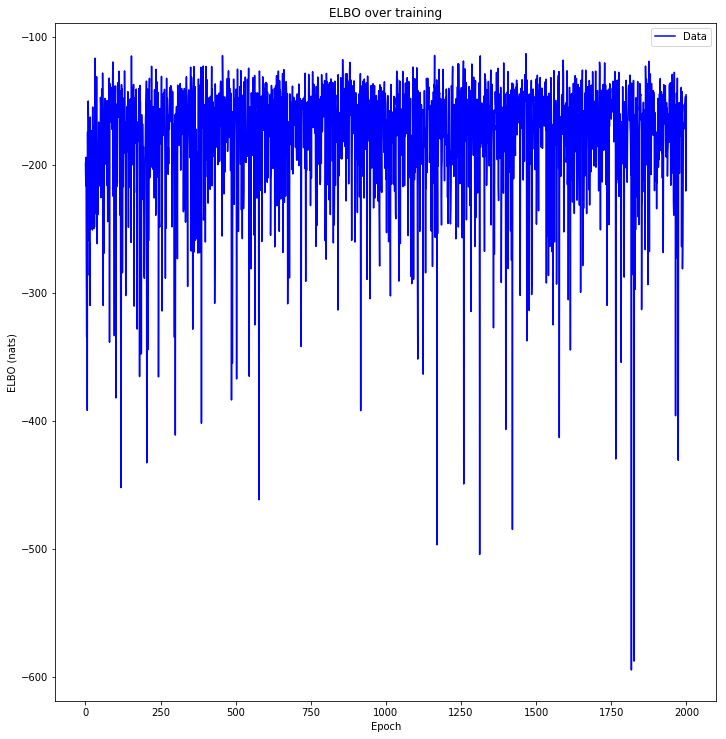

In [13]:
utils.plot_evidence_bounds(elbos)

In [14]:
ssm_smc = mcmc.reduce_resample_move_smc(ssm.SsmStep(batch_shape=particle_shape), lambda: range(50), initializer=init_ssm_proposal, moves=10)

In [15]:
_, inference, _ = ssm_smc(data=data)

In [16]:
for t in range(0, zs.shape[0]-1):
    key = generative.find(lambda k, v: str(t) in k and 'Deterministic' not in k)[0]
    z_t = 'Z_%d' % (t+1)
    accuracy = ((inference[key][z_t].value - utils.optional_to(generative[key][z_t], inference[key][z_t].value))**2).mean()
    print('SMC MSE at time %d: %f' % (t, accuracy))

SMC MSE at time 0: 1.025941
SMC MSE at time 1: 4.701268
SMC MSE at time 2: 4.698449
SMC MSE at time 3: 0.469139
SMC MSE at time 4: 0.364927
SMC MSE at time 5: 0.345201
SMC MSE at time 6: 1.224857
SMC MSE at time 7: 1.456120
SMC MSE at time 8: 1.147247
SMC MSE at time 9: 0.660629
SMC MSE at time 10: 1.841362
SMC MSE at time 11: 0.716408
SMC MSE at time 12: 0.924683
SMC MSE at time 13: 1.876263
SMC MSE at time 14: 3.836467
SMC MSE at time 15: 0.775175
SMC MSE at time 16: 2.000022
SMC MSE at time 17: 2.342724
SMC MSE at time 18: 2.121025
SMC MSE at time 19: 0.735657
SMC MSE at time 20: 0.853660
SMC MSE at time 21: 1.727254
SMC MSE at time 22: 0.710033
SMC MSE at time 23: 0.929262
SMC MSE at time 24: 1.842043
SMC MSE at time 25: 4.697031
SMC MSE at time 26: 3.577127
SMC MSE at time 27: 1.724032
SMC MSE at time 28: 3.935982
SMC MSE at time 29: 1.249841
SMC MSE at time 30: 2.102743
SMC MSE at time 31: 1.131840
SMC MSE at time 32: 0.372569
SMC MSE at time 33: 0.660677
SMC MSE at time 34: 1.50

In [17]:
init_ssm_params

"{'delta__loc': 'tensor(0.9852, grad_fn=<CloneBackward>)', 'delta__scale': 'tensor(0.6133, grad_fn=<CloneBackward>)', 'mu__loc': 'tensor(0.1131, grad_fn=<CloneBackward>)', 'mu__scale': 'tensor(0.6360, grad_fn=<CloneBackward>)', 'sigma__loc': 'tensor(0.1440, grad_fn=<CloneBackward>)', 'sigma__scale': 'tensor(1.4805, grad_fn=<CloneBackward>)'}"